In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import re
from pandas.plotting import scatter_matrix

In [2]:
df_main = pd.read_csv("ShowcaseDataWinter2023.csv")
df_main.head()

,price,appraisal_offer,online_appraisal_flag,model_year,mileage,make,model,trim_descrip,body,color,...,trim_descrip_appraisal,body_appraisal,color_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,market
0,$20k to $25k,$0k to $5k,1.0,2014.0,15k to 20k miles,HDT,HDT_12,Premium,E,Red,...,NaN,D,Silver,4.0L,6,17.0,21,236,21.0,13
1,$15k to $20k,$0k to $5k,0.0,2006.0,100k+ miles,KQZ,KQZ_23,Premium,E,Silver,...,Not Premium,D,Gold,4.2L,6,16.0,21,205,25.0,11
2,$30k to $35k,$35k to $40k,1.0,2014.0,5k to 10k miles,CZV,CZV_10,Premium,E,Black,...,NaN,E,Red,2.0L,4,41.0,38,181,10.0,13
3,$35k to $40k,$5k to $10k,1.0,2014.0,15k to 20k miles,IZA,IZA_19,Premium,F,Silver,...,Premium,F,Blue,3.0L,6,17.0,25,230,16.0,13
4,$30k to $35k,$15k to $20k,1.0,2011.0,35k to 40k miles,HDT,HDT_8,Premium,F,Blue,...,Not Premium,E,Black,2.4L,4,20.0,29,182,18.0,16


In [8]:
df_semi = df_main.drop(['trim_descrip','trim_descrip_appraisal','body','body_appraisal'], axis=1)
df_semi = df_semi.dropna()
df_semi

,price,appraisal_offer,online_appraisal_flag,model_year,mileage,make,model,color,engine,cylinders,mpg_city,mpg_highway,horsepower,fuel_capacity,model_year_appraisal,mileage_appraisal,make_appraisal,model_appraisal,color_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,market
0,$20k to $25k,$0k to $5k,1.0,2014.0,15k to 20k miles,HDT,HDT_12,Red,2.0L,4,27.0,33.0,152,16.0,2001.0,200k+ miles,AIH,AIH_32,Silver,4.0L,6,17.0,21,236,21.0,13
1,$15k to $20k,$0k to $5k,0.0,2006.0,100k+ miles,KQZ,KQZ_23,Silver,3.5L,6,19.0,27.0,285,18.0,1996.0,0 to 10k miles,KQZ,KQZ_3,Gold,4.2L,6,16.0,21,205,25.0,11
2,$30k to $35k,$35k to $40k,1.0,2014.0,5k to 10k miles,CZV,CZV_10,Black,2.5L,4,24.0,30.0,187,15.0,2014.0,10k to 20k miles,CIP,CIP_16,Red,2.0L,4,41.0,38,181,10.0,13
4,$30k to $35k,$15k to $20k,1.0,2011.0,35k to 40k miles,HDT,HDT_8,Blue,2.5L,4,17.0,23.0,305,15.0,2011.0,20k to 30k miles,LTX,LTX_20,Black,2.4L,4,20.0,29,182,18.0,16
5,$15k to $20k,$5k to $10k,0.0,2013.0,35k to 40k miles,OFW,OFW_11,White,2.4L,4,25.0,35.0,185,18.0,2009.0,160k to 170k miles,FJE,FJE_10,Black,3.6L,6,18.0,27,292,19.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,$15k to $20k,$15k to $20k,1.0,2013.0,10k to 15k miles,OFW,OFW_6,Black,2.0L,4,28.0,37.0,147,14.0,2015.0,0 to 10k miles,LTX,LTX_30,Black,1.4L,4,26.0,31,138,14.0,1
199996,$20k to $25k,$10k to $15k,0.0,2014.0,55k to 60k miles,ARU,ARU_12,White,2.5L,4,27.0,37.0,182,16.0,2010.0,50k to 60k miles,HXQ,HXQ_8,Black,1.8L,4,30.0,39,143,13.0,8
199997,$30k to $35k,$0k to $5k,0.0,2014.0,10k to 15k miles,AIH,AIH_13,Silver,2.5L,4,28.0,39.0,206,16.0,2004.0,120k to 130k miles,HXQ,HXQ_14,Gray,2.4L,4,21.0,30,177,18.0,3
199998,$30k to $35k,$10k to $15k,0.0,2012.0,50k to 55k miles,KQZ,KQZ_3,Black,3.5L,6,17.0,23.0,282,23.0,2006.0,130k to 140k miles,BZQ,BZQ_4,White,5.7L,8,13.0,19,390,26.0,11


In [9]:
df_main.isna().sum()

price                          0
appraisal_offer                0
online_appraisal_flag       3834
model_year                     0
mileage                        0
make                           0
model                          0
trim_descrip               23841
body                       10259
color                         33
engine                         0
cylinders                      0
mpg_city                     590
mpg_highway                  590
horsepower                     0
fuel_capacity                  4
model_year_appraisal           0
mileage_appraisal              0
make_appraisal                 0
model_appraisal            21508
trim_descrip_appraisal     31080
body_appraisal                 0
color_appraisal             1318
engine_appraisal               0
cylinders_appraisal            0
mpg_city_appraisal             1
mpg_highway_appraisal          0
horsepower_appraisal           0
fuel_capacity_appraisal      312
market                         0
dtype: int

# Many customers decide to trade-in their current vehicle when purchasing a vehicle at CarMax. 
# What does a customer's appraised vehicle tell us about the vehicle they will end up purchasing? How can CarMax use this information to improve business operations and provide customers a personalized shopping experience?

# Ordinal
- price [x]
- appraisal_offer [x]
- mileage [x]
- mileage_appraisal [x]

# Boolean
- online_appraisal_flag [x]
- trim_descrip [x]
- trim_descrip_appraisal [x]

# Numerical
- model_year [x]
- model_year_appraisal [x]
- engine []
- engine_appraisal []
- cylinders []
- cylinders_appraisal []
- mpg_city []
- mpg_city_appraisal []
- mpg_highway []
- mog_highway_appraisal []mileage
- horsepower []
- horsepower_appraisal []
- fuel_capacity []
- fuel_capacity_appraisal []

# Categorical (OHE)
- make [x]
- make_appraisal [x]
- model [x]
- model_appraisal [x]
- body [x]
- body_appraisal [x]
- color []
- color_appraisal []
- market [x]

# Drop NaNs

In [3]:
df = df_main.copy().dropna()

In [11]:
df.to_csv("clean_showcaseData.csv")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128683 entries, 1 to 199999
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    128683 non-null  object 
 1   appraisal_offer          128683 non-null  object 
 2   online_appraisal_flag    128683 non-null  float64
 3   model_year               128683 non-null  float64
 4   mileage                  128683 non-null  object 
 5   make                     128683 non-null  object 
 6   model                    128683 non-null  object 
 7   trim_descrip             128683 non-null  object 
 8   body                     128683 non-null  object 
 9   color                    128683 non-null  object 
 10  engine                   128683 non-null  object 
 11  cylinders                128683 non-null  int64  
 12  mpg_city                 128683 non-null  float64
 13  mpg_highway              128683 non-null  float64
 14  hors

In [13]:
def convertCols(df=df, include_trim=True):
    
    df['online_appraisal_flag'] = df['online_appraisal_flag'].astype('int')
    df['model_year'] = df['model_year'].astype('int')
    df['model_year_appraisal'] = df['model_year_appraisal'].astype('int')
    
    trim_bool = {
        'Premium': 1,
        'Not Premium': 0
    }
    
    df['model'] = [int(re.findall(r'\d+',i)[0]) for i in df['model']]
    df['model_appraisal'] = [int(re.findall(r'\d+',i)[0]) for i in df['model_appraisal']]
    
    if include_trim==True:
        df['trim_descrip'] = df['trim_descrip'].map(trim_bool)
        df['trim_descrip_appraisal'] = df['trim_descrip_appraisal'].map(trim_bool)
    
    df['engine'] = [float(i.replace('L','')) for i in df['engine']]
    df['engine_appraisal'] = [float(i.replace('L','')) for i in df['engine_appraisal']]
    
    return df

from sklearn.preprocessing import OrdinalEncoder

def encodeVariables(col, df=df):
    # in order to automate the ordering, extract the first set of numbers and order by ascending
    if col == 'price':
        categories = ['$0 to $15k','$15k to $20k', '$20k to $25k','$25k to $30k','$30k to $35k', '$35k to $40k', 
        '$40k to $45k',  '$45k to $50k','$50k to $55k','$55k to $60k','$60k to $65k','$65k to $70k','$70k+']
    elif col == 'appraisal_offer':
        categories = ['$0k to $5k','$5k to $10k','$10k to $15k','$15k to $20k','$20k to $25k','$25k to $30k','$30k to $35k','$35k to $40k','$40k+']
    elif col == 'mileage':
        categories = ['0 to 5k miles','5k to 10k miles', '10k to 15k miles','15k to 20k miles','20k to 25k miles','25k to 30k miles','30k to 35k miles', '35k to 40k miles','40k to 45k miles', 
                      '45k to 50k miles','50k to 55k miles','55k to 60k miles','60k to 65k miles','65k to 70k miles','70k to 75k miles','75k to 80k miles','80k to 85k miles','85k to 90k miles',
                      '90k to 95k miles','95k to 100k miles','100k+ miles']
    elif col == 'mileage_appraisal':
        categories = ['0 to 10k miles','10k to 20k miles','20k to 30k miles','30k to 40k miles','40k to 50k miles','50k to 60k miles','60k to 70k miles','70k to 80k miles','80k to 90k miles', 
                      '90k to 100k miles','100k to 110k miles','110k to 120k miles','120k to 130k miles', '130k to 140k miles','140k to 150k miles','150k to 160k miles','160k to 170k miles',
                      '170k to 180k miles','180k to 190k miles','190k to 200k miles','200k+ miles']
    
    encoder = OrdinalEncoder(categories=[categories])
    # print(enc)
    encoded_list = encoder.fit_transform(df[col].values.reshape(-1,1))
    
    return encoder, encoded_list

def encodeDF(df):
    
    _, df['price'] = encodeVariables('price',df)
    _, df['appraisal_offer'] = encodeVariables('appraisal_offer',df)
    _, df['mileage'] = encodeVariables('mileage',df)
    _, df['mileage_appraisal'] = encodeVariables('mileage_appraisal',df)
    
    return df

In [14]:
df_semi = convertCols(df_semi, include_trim=False)
df_semi = encodeDF(df_semi)
df_semi

,price,appraisal_offer,online_appraisal_flag,model_year,mileage,make,model,color,engine,cylinders,mpg_city,mpg_highway,horsepower,fuel_capacity,model_year_appraisal,mileage_appraisal,make_appraisal,model_appraisal,color_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,market
0,2.0,0.0,1,2014,3.0,HDT,12,Red,2.0,4,27.0,33.0,152,16.0,2001,20.0,AIH,32,Silver,4.0,6,17.0,21,236,21.0,13
1,1.0,0.0,0,2006,20.0,KQZ,23,Silver,3.5,6,19.0,27.0,285,18.0,1996,0.0,KQZ,3,Gold,4.2,6,16.0,21,205,25.0,11
2,4.0,7.0,1,2014,1.0,CZV,10,Black,2.5,4,24.0,30.0,187,15.0,2014,1.0,CIP,16,Red,2.0,4,41.0,38,181,10.0,13
4,4.0,3.0,1,2011,7.0,HDT,8,Blue,2.5,4,17.0,23.0,305,15.0,2011,2.0,LTX,20,Black,2.4,4,20.0,29,182,18.0,16
5,1.0,1.0,0,2013,7.0,OFW,11,White,2.4,4,25.0,35.0,185,18.0,2009,16.0,FJE,10,Black,3.6,6,18.0,27,292,19.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1.0,3.0,1,2013,2.0,OFW,6,Black,2.0,4,28.0,37.0,147,14.0,2015,0.0,LTX,30,Black,1.4,4,26.0,31,138,14.0,1
199996,2.0,2.0,0,2014,11.0,ARU,12,White,2.5,4,27.0,37.0,182,16.0,2010,5.0,HXQ,8,Black,1.8,4,30.0,39,143,13.0,8
199997,4.0,0.0,0,2014,2.0,AIH,13,Silver,2.5,4,28.0,39.0,206,16.0,2004,12.0,HXQ,14,Gray,2.4,4,21.0,30,177,18.0,3
199998,4.0,2.0,0,2012,10.0,KQZ,3,Black,3.5,6,17.0,23.0,282,23.0,2006,13.0,BZQ,4,White,5.7,8,13.0,19,390,26.0,11


In [15]:
df = convertCols(df)
df = encodeDF(df)
df

,price,appraisal_offer,online_appraisal_flag,model_year,mileage,make,model,trim_descrip,body,color,engine,cylinders,mpg_city,mpg_highway,horsepower,fuel_capacity,model_year_appraisal,mileage_appraisal,make_appraisal,model_appraisal,trim_descrip_appraisal,body_appraisal,color_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,market
1,1.0,0.0,0,2006,20.0,KQZ,23,1,E,Silver,3.5,6,19.0,27.0,285,18.0,1996,0.0,KQZ,3,0,D,Gold,4.2,6,16.0,21,205,25.0,11
4,4.0,3.0,1,2011,7.0,HDT,8,1,F,Blue,2.5,4,17.0,23.0,305,15.0,2011,2.0,LTX,20,0,E,Black,2.4,4,20.0,29,182,18.0,16
5,1.0,1.0,0,2013,7.0,OFW,11,0,F,White,2.4,4,25.0,35.0,185,18.0,2009,16.0,FJE,10,0,F,Black,3.6,6,18.0,27,292,19.0,10
6,5.0,8.0,0,2013,4.0,LTX,21,1,B,Blue,6.2,8,16.0,25.0,455,19.0,2012,3.0,LTX,27,0,B,Black,6.2,8,16.0,25,455,18.0,8
7,1.0,1.0,0,2012,6.0,LTX,30,0,E,Black,1.4,4,24.0,30.0,138,14.0,2010,8.0,HXQ,8,0,F,Silver,1.8,4,30.0,39,143,13.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1.0,3.0,1,2013,2.0,OFW,6,1,F,Black,2.0,4,28.0,37.0,147,14.0,2015,0.0,LTX,30,0,E,Black,1.4,4,26.0,31,138,14.0,1
199996,2.0,2.0,0,2014,11.0,ARU,12,0,F,White,2.5,4,27.0,37.0,182,16.0,2010,5.0,HXQ,8,0,B,Black,1.8,4,30.0,39,143,13.0,8
199997,4.0,0.0,0,2014,2.0,AIH,13,1,F,Silver,2.5,4,28.0,39.0,206,16.0,2004,12.0,HXQ,14,0,F,Gray,2.4,4,21.0,30,177,18.0,3
199998,4.0,2.0,0,2012,10.0,KQZ,3,0,D,Black,3.5,6,17.0,23.0,282,23.0,2006,13.0,BZQ,4,1,D,White,5.7,8,13.0,19,390,26.0,11


In [16]:
df.columns

Index(['price', 'appraisal_offer', 'online_appraisal_flag', 'model_year',
       'mileage', 'make', 'model', 'trim_descrip', 'body', 'color', 'engine',
       'cylinders', 'mpg_city', 'mpg_highway', 'horsepower', 'fuel_capacity',
       'model_year_appraisal', 'mileage_appraisal', 'make_appraisal',
       'model_appraisal', 'trim_descrip_appraisal', 'body_appraisal',
       'color_appraisal', 'engine_appraisal', 'cylinders_appraisal',
       'mpg_city_appraisal', 'mpg_highway_appraisal', 'horsepower_appraisal',
       'fuel_capacity_appraisal', 'market'],
      dtype='object')

In [17]:
df.loc[:,['price','appraisal_offer']].corr()['price'].sort_values()

appraisal_offer    0.381617
price              1.000000
Name: price, dtype: float64

In [18]:
pp = ['price','appraisal_offer']
for i in pp:
    print(df.loc[:,[i,'model_year']])

        price  model_year
1         1.0        2006
4         4.0        2011
5         1.0        2013
6         5.0        2013
7         1.0        2012
...       ...         ...
199995    1.0        2013
199996    2.0        2014
199997    4.0        2014
199998    4.0        2012
199999    8.0        2014

[128683 rows x 2 columns]
        appraisal_offer  model_year
1                   0.0        2006
4                   3.0        2011
5                   1.0        2013
6                   8.0        2013
7                   1.0        2012
...                 ...         ...
199995              3.0        2013
199996              2.0        2014
199997              0.0        2014
199998              2.0        2012
199999              3.0        2014

[128683 rows x 2 columns]


In [19]:
purchased_list = ['price','model_year','mileage','model','trim_descrip','engine','cylinders','mpg_city','mpg_highway','horsepower','fuel_capacity']
for i in purchased_list: 
    temp_df = df.loc[:,[i,'online_appraisal_flag','appraisal_offer',
           'model_year_appraisal', 'mileage_appraisal', 'model_appraisal', 'trim_descrip_appraisal',
           'engine_appraisal', 'cylinders_appraisal', 'mpg_city_appraisal', 'mpg_highway_appraisal', 'horsepower_appraisal', 
           'fuel_capacity_appraisal', 'market']]
    corr = temp_df.corr()
    print(f'-----------{i}------------')
    print(corr[i].sort_values(ascending=False))

-----------price------------
price                      1.000000
appraisal_offer            0.381617
horsepower_appraisal       0.350360
engine_appraisal           0.262764
model_year_appraisal       0.260976
fuel_capacity_appraisal    0.260249
cylinders_appraisal        0.244706
trim_descrip_appraisal     0.175461
online_appraisal_flag      0.037186
market                     0.008099
model_appraisal           -0.075318
mpg_city_appraisal        -0.198204
mileage_appraisal         -0.219970
mpg_highway_appraisal     -0.228436
Name: price, dtype: float64
-----------model_year------------
model_year                 1.000000
model_year_appraisal       0.206106
appraisal_offer            0.171365
horsepower_appraisal       0.061346
trim_descrip_appraisal     0.036176
online_appraisal_flag      0.027871
mpg_highway_appraisal      0.019483
mpg_city_appraisal         0.017483
fuel_capacity_appraisal    0.006310
engine_appraisal           0.000914
cylinders_appraisal       -0.007917
market   

# Logistic regression on ALL data to predict some metric of the purchased car

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

purchased_list = ['price','model_year','mileage','model','engine','cylinders','mpg_city','mpg_highway','horsepower','fuel_capacity']

for i in purchased_list:

    X = df_semi.loc[:,['online_appraisal_flag','appraisal_offer',
               'model_year_appraisal', 'mileage_appraisal', 'model_appraisal',
               'engine_appraisal', 'cylinders_appraisal', 'mpg_city_appraisal', 'mpg_highway_appraisal', 'horsepower_appraisal', 
               'fuel_capacity_appraisal']]
    y = df_semi.loc[:,i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

#     param_grid = [
#         {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
#         {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
#       ]

#     forest_reg = RandomForestRegressor()

    # grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
    #                            scoring='neg_mean_squared_error',
    #                            return_train_score=True)

    # grid_search.fit(X_train, y_train)
    # model = LogisticRegression()
    # model = RandomForestClassifier()
    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    # predictions = grid_search.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    print(f'{i}: {np.sqrt(mse)}')
    print(sorted([(name, score) for name, score in zip(model.feature_importances_, X.columns)], reverse=True))

    # cm = confusion_matrix(y_test, predictions)
    # print(cm)
    # print(accuracy_score(y_test,predictions))
    # print(roc_auc_score(y_test, predictions))

price: 1.7931071921687216
[(0.19913690319220623, 'appraisal_offer'), (0.19770814548191923, 'mileage_appraisal'), (0.15660737479685682, 'horsepower_appraisal'), (0.12516551297470252, 'model_year_appraisal'), (0.07440238562363877, 'mpg_highway_appraisal'), (0.06692367025479311, 'model_appraisal'), (0.056044411378148744, 'mpg_city_appraisal'), (0.04693302092221319, 'fuel_capacity_appraisal'), (0.0426463015290552, 'online_appraisal_flag'), (0.028151993737471924, 'engine_appraisal'), (0.0062802801089943605, 'cylinders_appraisal')]
model_year: 2.212991297134135
[(0.24137124606682372, 'mileage_appraisal'), (0.15395907775764053, 'model_year_appraisal'), (0.10020998997882123, 'mpg_highway_appraisal'), (0.0970097534297402, 'horsepower_appraisal'), (0.09407068743827908, 'model_appraisal'), (0.07748045513404804, 'mpg_city_appraisal'), (0.06458216576602085, 'appraisal_offer'), (0.05841338703943268, 'fuel_capacity_appraisal'), (0.058259665212094164, 'online_appraisal_flag'), (0.045632279146174556, '

In [ ]:
df_semi.describe().round()

In [ ]:
df_semi[df_semi['make'] == df_semi['make_appraisal']]

# Logistic regression on customers that sold and bought the same, use this data to predict some metric of the purchased car

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

purchased_list = ['price','model_year','mileage','model','engine','cylinders','mpg_city','mpg_highway','horsepower','fuel_capacity']

for i in purchased_list:
    
    X = df_semi.copy()
    X_sub = X[df_semi['make'] == df_semi['make_appraisal']]
    X = X_sub.loc[:,['appraisal_offer',
               'model_year_appraisal', 'mileage_appraisal', 'model_appraisal',
               'engine_appraisal', 'cylinders_appraisal', 'mpg_city_appraisal', 'mpg_highway_appraisal', 'horsepower_appraisal', 
               'fuel_capacity_appraisal']]
    # X = df.loc[:,['appraisal_offer',
    #            'model_year_appraisal', 'mileage_appraisal', 'model_appraisal', 'mpg_city_appraisal', 'mpg_highway_appraisal', 'horsepower_appraisal', ]]
    y = X_sub.loc[:,i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # param_grid = [
    #     {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    #     {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    #   ]

    # forest_reg = RandomForestRegressor()

    # grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
    #                            scoring='neg_mean_squared_error',
    #                            return_train_score=True)

    # grid_search.fit(X_train, y_train)
    # model = LogisticRegression()
    # model = RandomForestClassifier()
    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    # predictions = grid_search.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    print(f'{i}: {np.sqrt(mse)}')
    print(sorted([(name, score) for name, score in zip(model.feature_importances_, X.columns)], reverse=True))

    # cm = confusion_matrix(y_test, predictions)
    # print(cm)
    # print(accuracy_score(y_test,predictions))
    # print(roc_auc_score(y_test, predictions))

# Logistic regression on SAME sold-bought MAKE data to predict some metric of the purchased car

In [ ]:
df_semi[df_semi['make'] == df_semi['make_appraisal']]

In [ ]:
model_make = df_semi[(df_semi['make'] == df_semi['make_appraisal']) & (df_semi['model'] == df_semi['model_appraisal'])]

In [ ]:
model_make['market'].unique()

In [ ]:
mm_market = model_make.groupby('market')

In [ ]:
# for i in model_make['market'].unique():
group = 
df_by_market = mm_market.get_group(group)
print(f'--------- market: {group},{len(df_by_market)}  ----------')
createModel(df_by_market)
plt.close()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

def createModel(df_semi=df_semi):
    purchased_list = ['price','model_year','mileage','model','engine','cylinders','mpg_city','mpg_highway','horsepower','fuel_capacity']

    for i in purchased_list:

        X = df_semi.copy()
        X_sub = X[(df_semi['make'] == df_semi['make_appraisal']) & (df_semi['model'] == df_semi['model_appraisal'])]
        X = X_sub.loc[:,['appraisal_offer',
                   'model_year_appraisal', 'mileage_appraisal',
                   'engine_appraisal', 'cylinders_appraisal', 'mpg_city_appraisal', 'mpg_highway_appraisal', 'horsepower_appraisal', 
                   'fuel_capacity_appraisal']]
        # X = df.loc[:,['appraisal_offer',
        #            'model_year_appraisal', 'mileage_appraisal', 'model_appraisal', 'mpg_city_appraisal', 'mpg_highway_appraisal', 'horsepower_appraisal', ]]
        y = X_sub.loc[:,i]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        # param_grid = [
        #     {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
        #     {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
        #   ]

        # forest_reg = RandomForestRegressor()

        # grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
        #                            scoring='neg_mean_squared_error',
        #                            return_train_score=True)

        # grid_search.fit(X_train, y_train)
        # model = LogisticRegression()
        # model = RandomForestClassifier()
        model = RandomForestRegressor()
        model.fit(X_train, y_train)

        predictions = model.predict(X_test)
        # predictions = grid_search.predict(X_test)

        mse = mean_squared_error(y_test, predictions)
        # print(f'{i}: {np.sqrt(mse)}')
        feature_ranking = sorted([(name, score) for name, score in zip(model.feature_importances_, X.columns)])
        plt.figure()
        plt.barh(list(zip(*feature_ranking))[1],list(zip(*feature_ranking))[0],)
        plt.title(f'{i}: {np.sqrt(mse):.2f}, STD: {df_semi[i].std():.2f}')

        # cm = confusion_matrix(y_test, predictions)
        # print(cm)
        # print(accuracy_score(y_test,predictions))
        # print(roc_auc_score(y_test, predictions))
            
createModel()

In [ ]:
sorted([(name, score) for name, score in zip(model.feature_importances_, X.columns)], reverse=True)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
cvres['params']

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score), params)

In [ ]:
for name, score in zip(X.columns, model.feature_importances_):
    print(name, score)

# Groupby Market

In [ ]:
df.groupby('market')['market'].count()

# Create average price, appraisal_offer, model_year, mileage, model_year_appraisal, mileage_appraisal

# Columns of interest:

In [ ]:
col_interest = ['price', 'appraisal_offer', 'online_appraisal_flag', 'model_year',
       'mileage', 'make', 'model', 'trim_descrip', 'body', 
       'model_year_appraisal', 'mileage_appraisal', 'make_appraisal',
       'model_appraisal', 'trim_descrip_appraisal', 'body_appraisal','market']

# Group df by most sold make and only include interesting columns

In [ ]:
sub_df

In [ ]:
sub_df = df.copy().loc[:,col_interest]
sold_bought = list(zip(sub_df['make_appraisal'],sub_df['make']))
sold_group = sub_df.groupby('make_appraisal')

In [ ]:
sub_df.groupby('make_appraisal')['make_appraisal'].count().sort_values(ascending=False)[:10]

In [ ]:
LTX = sold_group.get_group('LTX')
LTX

# Attempt Logistic Regression Model to determine whether customer goes from LTX -> LTX or LTX -> not LTX

In [ ]:
LTX_lr = LTX.copy().loc[:,['make','model_year_appraisal', 'mileage_appraisal', 'model_appraisal', 'trim_descrip_appraisal','market']]
LTX_lr['make'] = np.where(LTX_lr['make'] == 'LTX', 1,0)
LTX_lr['year_derived'] = 2022 - LTX_lr['model_year_appraisal']
LTX_lr['miles_per_year'] = LTX_lr['mileage_appraisal']/LTX_lr['year_derived']

In [ ]:
LTX_lr

In [ ]:
LTX_lr.corr()['make'].sort_values(ascending=False)

In [ ]:
LTX_lr.info()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [ ]:
LTX_lr.head()

In [ ]:
LTX_lr_ohe = pd.get_dummies(LTX_lr, columns=['model_year_appraisal','model_appraisal','market'], prefix=['year','model','market'], drop_first=True)
# LTX_lr_ohe['mileage_appraisal'] = scaler.fit_transform(LTX_lr_ohe['mileage_appraisal'].values.reshape(-1,1))
LTX_lr_ohe.head()

In [ ]:
X

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

LTX_lr
X = LTX_lr.iloc[:,1:]
y = LTX_lr.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# model = LogisticRegression()
model = RandomForestClassifier()
model.fit(X_train, y_train)

cm = confusion_matrix(y_test, predictions)
print(cm)
print(accuracy_score(y_test,predictions))
print(roc_auc_score(y_test, predictions))

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
predictions = lr.predict(X_test)

In [ ]:
LTX[LTX['make'] == 'LTX']

In [ ]:
LTX[LTX['make'] == 'LTX'].hist(figsize=(20,15), density=True)

In [ ]:
LTX[LTX['make'] != 'LTX'].hist(figsize=(20,15), density=True)

# Group df by bought make and include only interesting columns

In [ ]:
grouped_df = sub_df.groupby('make')

# The most common car sold and then purchased

In [ ]:
from collections import Counter

sb_counter = Counter(sold_bought)

In [ ]:
sb_counter.most_common()[:10]

# Most commonly purchased 'make'

In [ ]:
sub_df.groupby('make')['make'].count().sort_values(ascending=False)[:5]

# Most commonly sold 'make'

In [ ]:
sub_df.groupby('make_appraisal')['make_appraisal'].count().sort_values(ascending=False)[:5]

# Analyzing most popular purchased car make, AIH

In [ ]:
AIH = grouped_df.get_group('AIH')
AIH.head()

In [ ]:
AIH.hist(bins=20, figsize=(20,15))

In [ ]:
list_of_makes = loyalty_df['make'].unique()
list_of_makes

In [ ]:
for i in list_of_makes:
    print(len(grouped_make.get_group(i)),i)

# Things to do:

- Price and appraisal_offer seem to be the 'target' type columns

- Depending on binary record 'online_apprasial_flag', should all feature columns be verified with the online and appraisal values?

- Convert relevant string data into numerical 
    - price
    - appraisal_offer
    - mileage
    - milage_appraisal
    
- Change the following data types
    - online_appraisal_flag -> to int
    - model_year -> to int
    - enging -> to int (given all values in X.XL format)
    
- Make/Model abbreviations are not trivial
- Check for NaNs on all columns
- 'Market' is a categorical variable?

# RUN BELOW CELL TO RESET DF

## Visualize NaNs

In [ ]:
plt.bar(df_main.count().keys(), df_main.count().values)
plt.xticks(rotation = 90)

In [ ]:
df_wnans = df_main.copy() 
df = df_main.copy().dropna()
df

# Create ordinal encoding for variables such as price, appraisal_offer, mileage, mileage_appraisal

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

def encodeVariables(col, df):
    # in order to automate the ordering, extract the first set of numbers and order by ascending
    if col == 'price':
        categories = ['$0 to $15k','$15k to $20k', '$20k to $25k','$25k to $30k','$30k to $35k', '$35k to $40k', 
        '$40k to $45k',  '$45k to $50k','$50k to $55k','$55k to $60k','$60k to $65k','$65k to $70k','$70k+']
    elif col == 'appraisal_offer':
        categories = ['$0k to $5k','$5k to $10k','$10k to $15k','$15k to $20k','$20k to $25k','$25k to $30k','$30k to $35k','$35k to $40k','$40k+']
    elif col == 'mileage':
        categories = ['0 to 5k miles','5k to 10k miles', '10k to 15k miles','15k to 20k miles','20k to 25k miles','25k to 30k miles','30k to 35k miles', '35k to 40k miles','40k to 45k miles', 
                      '45k to 50k miles','50k to 55k miles','55k to 60k miles','60k to 65k miles','65k to 70k miles','70k to 75k miles','75k to 80k miles','80k to 85k miles','85k to 90k miles',
                      '90k to 95k miles','95k to 100k miles','100k+ miles']
    elif col == 'mileage_appraisal':
        categories = ['0 to 10k miles','10k to 20k miles','20k to 30k miles','30k to 40k miles','40k to 50k miles','50k to 60k miles','60k to 70k miles','70k to 80k miles','80k to 90k miles', 
                      '90k to 100k miles','100k to 110k miles','110k to 120k miles','120k to 130k miles', '130k to 140k miles','140k to 150k miles','150k to 160k miles','160k to 170k miles',
                      '170k to 180k miles','180k to 190k miles','190k to 200k miles','200k+ miles']
    
    enc = OrdinalEncoder(categories=[categories])
    # print(enc)
    encoded_list = enc.fit_transform(df[col].values.reshape(-1,1))
    
    return encoded_list

# Focusing in on staying loyal to the brand
## purchased make is same as appraised_make
## include just a few variables in the analysis
    - price
    - mileage
    - body style

In [ ]:
loyalty_df = df.copy()
loyalty_df = loyalty_df[df['make'] == df['make_appraisal']]
# loyalty_df = loyalty_df[df['body'] == df['body_appraisal']]

loyalty_df['price'] = encodeVariables('price', loyalty_df)
loyalty_df['appraisal_offer'] = encodeVariables('appraisal_offer', loyalty_df)
loyalty_df['mileage'] = encodeVariables('mileage', loyalty_df)

loyalty_df['model'] = [int(re.findall(r'\d+',i)[0]) for i in loyalty_df['model']]
loyalty_df['model_appraisal'] = [int(re.findall(r'\d+',i)[0]) for i in loyalty_df['model_appraisal']]

# loyalty_df = loyalty_df[loyalty_df['model'] == loyalty_df['model_appraisal']]

loyalty_df['mileage_appraisal'] = encodeVariables('mileage_appraisal', loyalty_df)
loyalty_df

In [ ]:
loyalty_df.columns

In [ ]:
loyalty_small = loyalty_df.loc[:,['price','appraisal_offer','model_year','mileage','model_year_appraisal','mileage_appraisal','cylinders_appraisal','horsepower_appraisal']]
loyalty_small['model_year'] = loyalty_small['model_year'].astype('int')
loyalty_small['model_year_appraisal'] = loyalty_small['model_year_appraisal'].astype('int')
# loyalty_small['body_appraisal'] = encodeVariables('body_appraisal',loyalty_df)
loyalty_small.head()

In [ ]:
list_of_makes = loyalty_df['make'].unique()
list_of_makes

In [ ]:
for i in list_of_makes:
    print(len(grouped_make.get_group(i)),i)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

grouped_make = loyalty_df.groupby('make')

for i in list_of_makes:

    grouped_loyalty = grouped_make.get_group(i)

    # Load the data
    X = grouped_loyalty.loc[:,['appraisal_offer','model_year_appraisal','mileage_appraisal','cylinders_appraisal',
       'mpg_city_appraisal', 'mpg_highway_appraisal', 'horsepower_appraisal',
       'fuel_capacity_appraisal']] # features
    y = grouped_loyalty['price'] # targets

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
    print(len(X_train), len(X_test))
    if len(X_test) < 2:
        break

    # Create the decision tree model
    # model = DecisionTreeClassifier()
#     model = RandomForestRegressor()
#     # model = RandomForestClassifier()

#     # Fit the model to the train data
#     model.fit(X_train, y_train)
    dt = xgb.DMatrix(X_train, label=y_train)
    dv = xgb.DMatrix(X_test, label=y_test)
    
    # params = {
    #     "eta": 0.5,
    #     "max_depth": 4,
    #     "objective": "reg:squarederror",
    #     "silent": 0,
    #     "base_score": np.mean(y_test),
    #     "eval_metric": "rmse"
    # }
    # model = xgb.train(params, dt, 300, [(dt, "train"),(dv, "valid")], early_stopping_rounds=10, verbose_eval=25)
    
    model = xgb.XGBClassifier()
    model.fit(X_train, y_train)
    
    # predictions = model.predict(dv)


    # Make predictions on the train and test data
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    # train_predictions = model.predict(dt)
    # test_predictions = model.predict(dv)

    train_r2 = r2_score(y_train, train_predictions)
    test_r2 = r2_score(y_test, test_predictions)

    # Plot the actual vs predicted values
    def plot_predictions(train_predictions, train_targets, test_predictions, test_targets):
        plt.scatter(train_predictions, train_targets, label=f'Train, r={train_r2:.2f}',c='orange')
        plt.scatter(test_predictions, test_targets, label=f'Test, r={test_r2:.2f}',c='blue')
        plt.plot([min(min(train_predictions),min(test_predictions)), max(max(train_predictions),max(test_predictions))], 
                 [min(min(train_predictions),min(test_predictions)), max(max(train_predictions), max(test_predictions))], color='black')
        plt.xlabel('Predictions')
        plt.ylabel('Targets')
        plt.title(i)
        plt.legend()
        plt.show()

    plot_predictions(train_predictions, y_train, test_predictions, y_test)


In [ ]:
sns.

In [ ]:
KQZ = grouped_make.get_group('KQZ')
KQZ = KQZ[KQZ['model'] == KQZ['model_appraisal']]

In [ ]:
# KQZ.plot(kind='scatter',x='price',y='appraisal_offer',alpha=0.1)
import seaborn as sns

sns.heatmap(KQZ.corr())

In [ ]:
from pandas.plotting import scatter_matrix

AIH = 

attrib=["price","appraisal_offer","model_year","mileage","model_year_appraisal","mileage_appraisal"]
scatter_matrix(KQZ[attrib], figsize=(12,8))

# PREPROCESSING COLUMNS
- [x] price and appraisal_offer into numbers
- [x] online_appraisal_flag and model_year into ints
- [x] mileage into numbers
- [x] model contains same information as make so reduce
- [] make to be one-hot-encoded
- [x] model to be trimmed to number portion
- [] trim_descrip into boolean
- [] body one-hot-encoded
- [] color one-hot-encoded
- [] engine turned into a float, drop 'L'
- [] cylinders, mpg_city, mpg_highway, horsepower, fuel_capacity all good
- [] then come the _appraisal columns

## _appraisal columns describe the car that the customer brought-in for trade
## the non_appraisal columns describe the car that the customer purchased

# Supervised Problem
    - Given the vehicle that was brought into trade (_appraisal columns as features), can you predict the purchase price/mileage/model etc.
# Unsupervised Problem 
    - Calculate clusters for purchased and appraised cars and calculate their differences

In [8]:
import re

def getNumbers(col):
    first_list = [re.findall(r'\d+', i) for i in df[col]]
    second_list = [(int(i[0])+int(i[-1]))/2 for i in first_list]

    return second_list

def getMileage(col):
    mile_list = [re.findall(r'\d+', i) for i in df['mileage']]
    mile_list = [(int(i[0])+int(i[-1]))/2 if len(i)==2 else int(i[0]) for i in mile_list]
    
    return mile_list

df['price'] = getNumbers('price')
df['appraisal_offer'] = getNumbers('appraisal_offer')
df['online_appraisal_flag'] = df['online_appraisal_flag'].astype('int32')
df['model_year'] = df['model_year'].astype('int32')
df['mileage'] = getMileage('mileage')
purch_make = pd.get_dummies(df['make'], prefix='purch')
df['model'] = [int(re.findall(r'\d+',i)[0]) for i in df['model']]
df['trim_descrip'] = np.where(df['trim_descrip'] == 'Premium', 1, 0)
purch_body = pd.get_dummies(df['body'], prefix='purch')
purch_color = pd.get_dummies(df['color'], prefix='purch')
df['engine'] = [float(i.replace('L','')) for i in df['engine']]

In [9]:
import re

def getNumbers(col):
    first_list = [re.findall(r'\d+', i) for i in df[col]]
    second_list = [(int(i[0])+int(i[-1]))/2 for i in first_list]

    return second_list

def getMileage(col):
    mile_list = [re.findall(r'\d+', i) for i in df['mileage']]
    mile_list = [(int(i[0])+int(i[-1]))/2 if len(i)==2 else int(i[0]) for i in mile_list]
    
    return mile_list

price = getNumbers('price')
appraisal_offer = getNumbers('appraisal_offer')

concat_df = pd.DataFrame(
    price, appraisal_offer
)
concat_df
# df['online_appraisal_flag'] = df['online_appraisal_flag'].astype('int32')
# df['model_year'] = df['model_year'].astype('int32')
# df['mileage'] = getMileage('mileage')
# purch_make = pd.get_dummies(df['make'], prefix='purch')
# df['model'] = [int(re.findall(r'\d+',i)[0]) for i in df['model']]
# df['trim_descrip'] = np.where(df['trim_descrip'] == 'Premium', 1, 0)
# purch_body = pd.get_dummies(df['body'], prefix='purch')
# purch_color = pd.get_dummies(df['color'], prefix='purch')
# df['engine'] = [float(i.replace('L','')) for i in df['engine']]

TypeError: expected string or bytes-like object

# Concatenate a bunch of columns to make one new purchase_df 

In [17]:
purch_df = pd.concat([
    df[['price','appraisal_offer','online_appraisal_flag','model_year','mileage']],
    # purch_make,
    df[['model','trim_descrip']],
    # purch_body,
    # purch_color,
    df[['engine','cylinders','mpg_city','mpg_highway','horsepower','fuel_capacity']],
], axis=1)
purch_df

,price,appraisal_offer,online_appraisal_flag,model_year,mileage,model,trim_descrip,engine,cylinders,mpg_city,mpg_highway,horsepower,fuel_capacity
1,17.5,2.5,0,2006,100.0,23,1,3.5,6,19.0,27.0,285,18.0
4,32.5,17.5,1,2011,37.5,8,1,2.5,4,17.0,23.0,305,15.0
5,17.5,7.5,0,2013,37.5,11,0,2.4,4,25.0,35.0,185,18.0
6,37.5,40.0,0,2013,22.5,21,1,6.2,8,16.0,25.0,455,19.0
7,17.5,7.5,0,2012,32.5,30,0,1.4,4,24.0,30.0,138,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,17.5,17.5,1,2013,12.5,6,1,2.0,4,28.0,37.0,147,14.0
199996,22.5,12.5,0,2014,57.5,12,0,2.5,4,27.0,37.0,182,16.0
199997,32.5,2.5,0,2014,12.5,13,1,2.5,4,28.0,39.0,206,16.0
199998,32.5,12.5,0,2012,52.5,3,0,3.5,6,17.0,23.0,282,23.0


In [18]:
purch_df.corr()

,price,appraisal_offer,online_appraisal_flag,model_year,mileage,model,trim_descrip,engine,cylinders,mpg_city,mpg_highway,horsepower,fuel_capacity
price,1.000000,0.380791,0.038554,0.460892,-0.382330,0.034269,0.331257,0.578883,0.566107,-0.496909,-0.571156,0.678258,0.575369
appraisal_offer,0.380791,1.000000,0.194741,0.171863,-0.114691,0.015911,0.151129,0.225096,0.224905,-0.191044,-0.210569,0.279612,0.217602
online_appraisal_flag,0.038554,0.194741,1.000000,0.027871,0.002701,-0.002152,0.018520,0.005992,0.010051,-0.011068,-0.013445,0.017530,0.005318
model_year,0.460892,0.171863,0.027871,1.000000,-0.672358,0.008410,0.015445,-0.057900,-0.050572,0.128314,0.053958,0.012657,-0.075655
mileage,-0.382330,-0.114691,0.002701,-0.672358,1.000000,-0.009787,-0.032391,0.093066,0.092017,-0.122650,-0.069178,0.030944,0.123479
model,0.034269,0.015911,-0.002152,0.008410,-0.009787,1.000000,-0.059909,-0.071719,-0.026656,0.086796,0.029957,-0.042621,-0.018173
trim_descrip,0.331257,0.151129,0.018520,0.015445,-0.032391,-0.059909,1.000000,0.173132,0.162999,-0.186571,-0.200337,0.248148,0.120939
engine,0.578883,0.225096,0.005992,-0.057900,0.093066,-0.071719,0.173132,1.000000,0.898219,-0.739766,-0.710573,0.876300,0.793538
cylinders,0.566107,0.224905,0.010051,-0.050572,0.092017,-0.026656,0.162999,0.898219,1.000000,-0.703534,-0.684624,0.851110,0.755929
mpg_city,-0.496909,-0.191044,-0.011068,0.128314,-0.122650,0.086796,-0.186571,-0.739766,-0.703534,1.000000,0.922795,-0.774502,-0.752102


In [19]:
# sns.histplot(np.log1p(purch_df['price']))
sns.histplot(purch_df['price'])

NameError: name 'sns' is not defined

<AxesSubplot: >

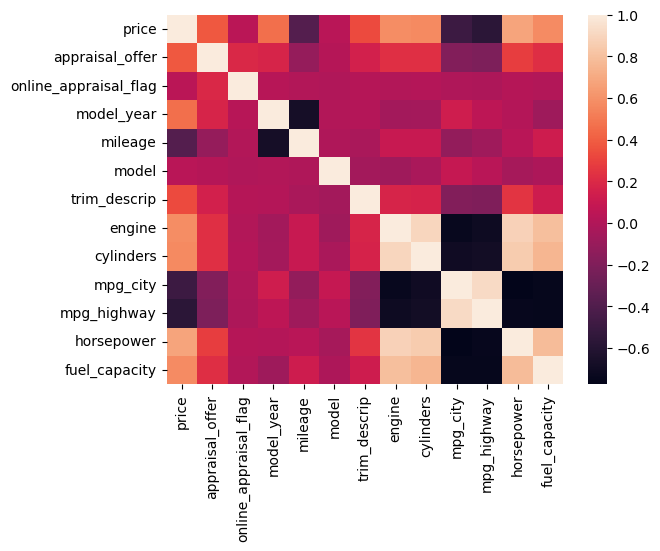

In [20]:
import seaborn as sns

sns.heatmap(purch_df.corr())

# Apply a DT-based regression

## split data into train-test-valid


In [ ]:
target = purch_df['price']
data = purch_df.drop('price', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assume that you have a variable called 'data' that contains your dataset
# and a variable called 'target' that contains the labels for your dataset
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [ ]:
r2

In [ ]:
appraised = getNumbers('appraisal_offer')

In [ ]:
len(appraised)

In [ ]:
purch_df['price']

In [ ]:
plt.scatter(purch_df['price'], appraised, )

In [ ]:
importances = model.feature_importances_
# Get the indices of the sorted importances
sorted_indices = importances.argsort()[::-1]
# Get the names of the features
feature_names = list(data.columns)

# Create a bar plot
plt.bara(range(10), importances[sorted_indices[:10]])
plt.xticks(range(10), [feature_names[i] for i in sorted_indices[:10]], rotation=90)
plt.show()

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Create a figure and set the size
fig = plt.figure(figsize=(8, 4))

# Add a subplot to the figure
ax = fig.add_subplot(1, 1, 1)

# Plot the r2 scores
ax.plot([0, 1], [train_r2, test_r2])


In [ ]:
mse

## create model, train, predict, validate

# Apply K-Means cluster on purch_df

In [4]:
from sklearn.cluster import KMeans

KMeans(n_clusters=2, random_state=42)

In [25]:
df.columns

Index(['price', 'appraisal_offer', 'online_appraisal_flag', 'model_year',
       'mileage', 'make', 'model', 'trim_descrip', 'body', 'color', 'engine',
       'cylinders', 'mpg_city', 'mpg_highway', 'horsepower', 'fuel_capacity',
       'model_year_appraisal', 'mileage_appraisal', 'make_appraisal',
       'model_appraisal', 'trim_descrip_appraisal', 'body_appraisal',
       'color_appraisal', 'engine_appraisal', 'cylinders_appraisal',
       'mpg_city_appraisal', 'mpg_highway_appraisal', 'horsepower_appraisal',
       'fuel_capacity_appraisal', 'market'],
      dtype='object')

In [27]:
df.loc[:,['price', 'appraisal_offer', 'online_appraisal_flag', 'model_year',
       'mileage', 'make', 'model_year_appraisal', 'mileage_appraisal', 'make_appraisal', 'market']]

,price,appraisal_offer,online_appraisal_flag,model_year,mileage,make,model_year_appraisal,mileage_appraisal,make_appraisal,market
1,17.5,2.5,0,2006,100.0,KQZ,1996.0,0 to 10k miles,KQZ,11
4,32.5,17.5,1,2011,37.5,HDT,2011.0,20k to 30k miles,LTX,16
5,17.5,7.5,0,2013,37.5,OFW,2009.0,160k to 170k miles,FJE,10
6,37.5,40.0,0,2013,22.5,LTX,2012.0,30k to 40k miles,LTX,8
7,17.5,7.5,0,2012,32.5,LTX,2010.0,80k to 90k miles,HXQ,1
...,...,...,...,...,...,...,...,...,...,...
199995,17.5,17.5,1,2013,12.5,OFW,2015.0,0 to 10k miles,LTX,1
199996,22.5,12.5,0,2014,57.5,ARU,2010.0,50k to 60k miles,HXQ,8
199997,32.5,2.5,0,2014,12.5,AIH,2004.0,120k to 130k miles,HXQ,3
199998,32.5,12.5,0,2012,52.5,KQZ,2006.0,130k to 140k miles,BZQ,11


In [13]:
purch_df.head()

,price,appraisal_offer,online_appraisal_flag,model_year,mileage,purch_AIH,purch_ARU,purch_BDP,purch_BGZ,purch_BXO,...,purch_Tan,purch_Unknown,purch_White,purch_Yellow,engine,cylinders,mpg_city,mpg_highway,horsepower,fuel_capacity
1,17.5,2.5,0,2006,100.0,0,0,0,0,0,...,0,0,0,0,3.5,6,19.0,27.0,285,18.0
4,32.5,17.5,1,2011,37.5,0,0,0,0,0,...,0,0,0,0,2.5,4,17.0,23.0,305,15.0
5,17.5,7.5,0,2013,37.5,0,0,0,0,0,...,0,0,1,0,2.4,4,25.0,35.0,185,18.0
6,37.5,40.0,0,2013,22.5,0,0,0,0,0,...,0,0,0,0,6.2,8,16.0,25.0,455,19.0
7,17.5,7.5,0,2012,32.5,0,0,0,0,0,...,0,0,0,0,1.4,4,24.0,30.0,138,14.0


In [23]:
purch_df

,price,appraisal_offer,online_appraisal_flag,model_year,mileage,model,trim_descrip,engine,cylinders,mpg_city,mpg_highway,horsepower,fuel_capacity
1,17.5,2.5,0,2006,100.0,23,1,3.5,6,19.0,27.0,285,18.0
4,32.5,17.5,1,2011,37.5,8,1,2.5,4,17.0,23.0,305,15.0
5,17.5,7.5,0,2013,37.5,11,0,2.4,4,25.0,35.0,185,18.0
6,37.5,40.0,0,2013,22.5,21,1,6.2,8,16.0,25.0,455,19.0
7,17.5,7.5,0,2012,32.5,30,0,1.4,4,24.0,30.0,138,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,17.5,17.5,1,2013,12.5,6,1,2.0,4,28.0,37.0,147,14.0
199996,22.5,12.5,0,2014,57.5,12,0,2.5,4,27.0,37.0,182,16.0
199997,32.5,2.5,0,2014,12.5,13,1,2.5,4,28.0,39.0,206,16.0
199998,32.5,12.5,0,2012,52.5,3,0,3.5,6,17.0,23.0,282,23.0


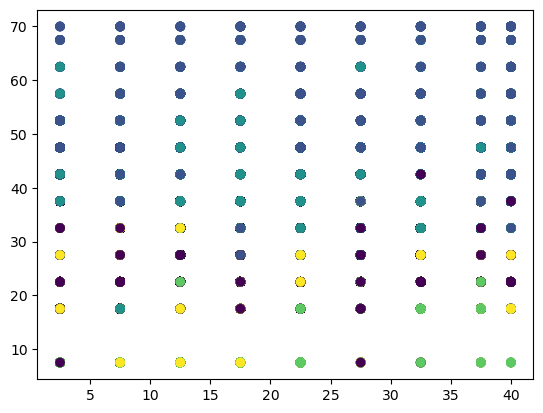

In [22]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(purch_df)
plt.scatter(x=purch_df['appraisal_offer'], y=purch_df['price'], c=kmeans.labels_)

In [ ]:
df['make'].unique()

In [ ]:
df.head()

In [ ]:
df.info()